# Pseudospectral tutorial, part 1
## Les Houches, summer 2017


A gentle stroll through pseudospectral methods: differentiating functions with the FFT.




## 1D domain - functions on the real line,  $f(x)$ 

First load the package for plotting.

In [5]:
using PyPlot

Create the physical grid $x$. For a domain of length $L_x$ with $n_x$ grid points the grid spacing is $\delta=L_x/n_x$. Our grid points then are: $x = 0,\delta, 2\delta,\dots,L_x-\delta$. Notice, that the final grid point *does not* correspond to $x=L_x$ but to $x=L_x-\delta$. 

In [10]:
nx = 64
Lx = 2.0*pi

dx = Lx/nx
 x = 0:dx:Lx-dx

k  = 2.0*pi/Lx * cat(1, 0:nx/2, -nx/2+1:-1);

Let's take a known function $f(x)$ defined on the grid and see how to calculate its derivative numerically. We shall first take a function for which we have a closed form for its derivative so that we can check our numerical results. (This step may seem obvious, but many overlook it nonetheless...)

We have to make sure that our function is periodic with period $L_x$. Since we took $L_x=2\pi$ then all sines and cosines with integer wavenumbers satisfy the periodicity.

In [11]:
       f = sin.(2*x) + 0.5*cos.(4*x)   # a test function f(x)
 dfdx_an = 2*cos.(2*x) - 2*sin.(4*x)   # the analytic expression for df/dx

      fh = fft(f)                      # the FFT of f(x)
dfdx_num = real(ifft(im*k.*fh));       # the numerical approximation for df/df

Let's plot the fft of $f(x)$. Do we see power at the wavenumbers we expected?

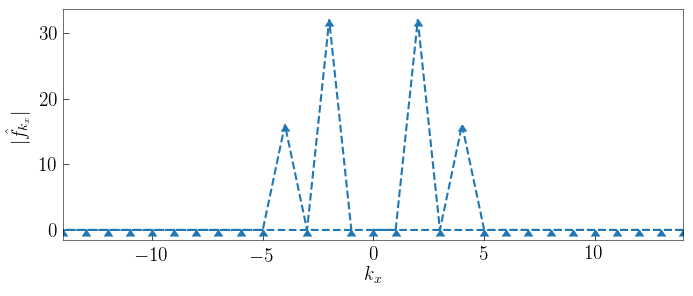

In [12]:
figure(1, figsize=(8, 3) )
plot(k, abs.(fh), marker=6, linestyle="dashed")  # plots the abs value of fft of f(x)
xlim(-14, 14)
xlabel(L"k_x")
ylabel(L"|\hat{f}_{k_x}|");

Now let's compare the numerical approximation of $\textrm{d}f/\textrm{d}x$ with the analytical one.

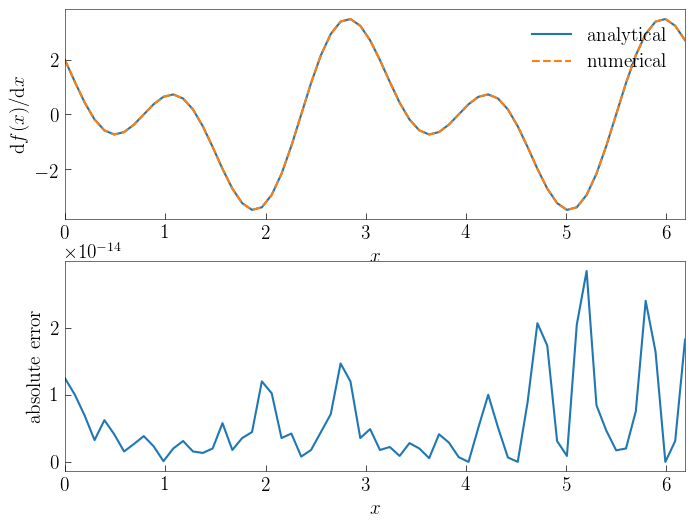

In [13]:
fig, axs = subplots(nrows=2, ncols=1, figsize=(8, 6) )
axs[1][:plot](x, dfdx_an, label="analytical")
axs[1][:plot](x, dfdx_num, linestyle="dashed", label="numerical")
axs[2][:plot](x, abs.(dfdx_an - dfdx_num))

axs[1][:set_xlabel](L"x")
axs[1][:set_ylabel](L"\textrm{d}f(x)/\textrm{d}x")
axs[1][:legend](loc="upper right", fancybox="true")
axs[1][:set_xlim](0, Lx-dx)

axs[2][:set_xlabel](L"x")
axs[2][:set_ylabel]("absolute error")
axs[2][:set_xlim](0, Lx-dx);

So we got machine precission error. And with only $n_x=64$ points. Try doing that with finite differences...

**Exercise**: Can we push it even further perhaps? What about if we had $n_x=32$ points? How far can we decreasee the resolution and still evaluate $\textrm{d}f/\textrm{d}x$ with machine precision?

## 2D domain - functions  $~f(x,y)$ 

Let's apply the same principles on a two-dimensional domain.

First, we  create the physical grid $x$, $y$. It is instructive to take different domain lengths, $L_x$ and $L_y$ and different grid points in each direction, $n_x$, $n_y$. This way make sure that we treat each dimension correctly.

In [14]:
nx, ny = 64, 32               # number of grid points
Lx, Ly = 2.0*pi, 1.0*pi       # size of the domain in each direction

# constructing the physical grid (x,y)
dx, dy = Lx/nx, Ly/ny
 x = 0:dx:Lx-dx
 y = 0:dy:Ly-dy

X  = zeros(nx,ny)
Y  = zeros(nx,ny)
for j in 1:ny, i in 1:nx
    X[i,j], Y[i, j] = x[i], y[j]
end

# constructing the wavenumber grid (k,l)
k  = 2.0*pi/Lx * cat(1, 0:nx/2, -nx/2+1:-1);
l  = 2.0*pi/Ly * cat(1, 0:ny/2, -ny/2+1:-1);

k0 = 2.0*pi/Lx            # the fundamental x-wavenumber
l0 = 2.0*pi/Ly            # the fundamental y-wavenumber

K = zeros(nx, ny)
L = zeros(nx, ny)
for j in 1:ny, i in 1:nx
    K[i, j], L[i, j] = k[i], l[j]
end

Now let's define a two-dimensional function $f(x,y)$ and compute $\partial f/\partial y$.

In [23]:
mx, my = 3, 2
f = cos.(mx*k0*X).*sin.(my*l0*Y)
fh = fft(f)

dfdy_an  = my*l0*cos.(mx*k0*X).*cos.(my*l0*Y)
dfdy_num = real(ifft(im*L.*fh));

**Exercise:** Plot the two-dimensional power spectra of $f$: $|\hat{f}_{k_x,k_y}|$. Is this what you expected to see?

Now, as before, let's plot the numerical and analytical $\partial f/\partial y$ and compare. If all is good, we should expect machine precision error...

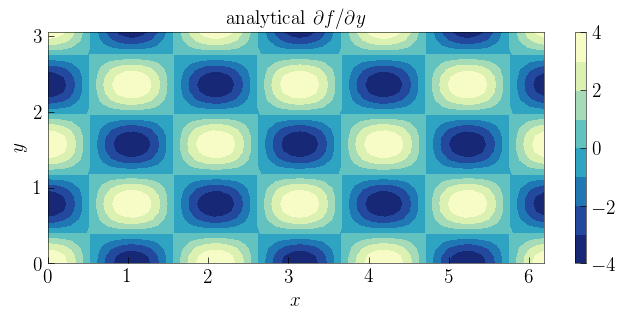

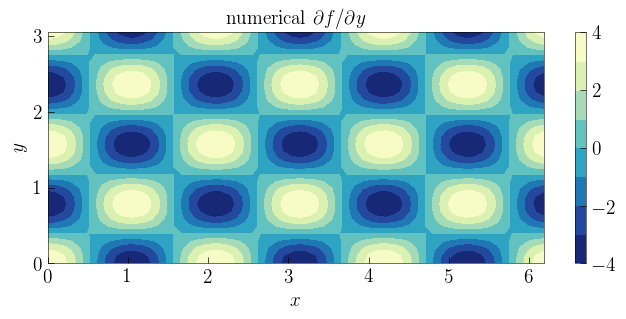

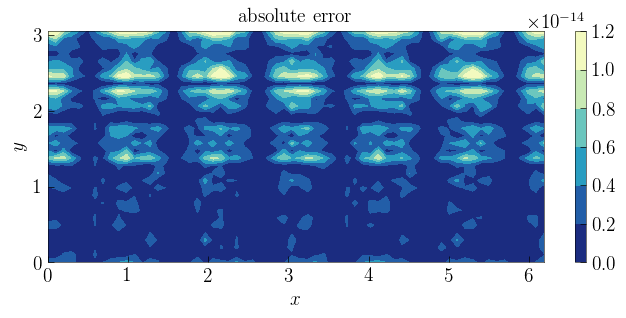

In [24]:
levs = -4:1:4   # the contour levels for the plots of \partial f/\partial y

# contour plot of the analytical \partial f/\partial y
figure(figsize=(8, 3))
contourf(X, Y, dfdy_an, levs, label="analytical")  # notice that contour levels are prescribed
xlabel(L"$x$")
ylabel(L"$y$")
title(L"analytical $\partial f/\partial y$")
xlim(0, Lx-dx)
ylim(0, Ly-dy)
clim(-4,4)
colorbar(ticks=-4:2:4)

# contour plot of the numerical approcimation to \partial f/\partial y
figure(figsize=(8, 3))
contourf(X, Y, dfdy_num, levs, label="numerical")

xlabel(L"$x$")
ylabel(L"$y$")
title(L"numerical $\partial f/\partial y$")
xlim(0, Lx-dx)
ylim(0, Ly-dy)
clim(-4,4)
colorbar(ticks=-4:2:4)

# contour plot of the absolute error
figure(figsize=(8, 3))
contourf(X, Y, abs.(dfdy_an - dfdy_num), label="error")

xlabel(L"$x$")
ylabel(L"$y$")
title("absolute error")
xlim(0, Lx-dx)
ylim(0, Ly-dy)
colorbar();

In [21]:
rel_error = abs.(maximum(abs.(dfdy_an)) - maximum(abs.(dfdy_num)))/maximum(abs.(dfdy_an))

8.881784197001252e-16